(dem-class)=

# The digital elevation model ({class}`~xdem.DEM`)

Below, a summary of the {class}`~xdem.DEM` object and its methods.

(dem-obj-def)=

## Object definition and attributes

A {class}`~xdem.DEM` is a {class}`~geoutils.Raster` with an additional georeferenced vertical dimension stored in the attribute {attr}`~xdem.DEM.vcrs`.
It inherits the **four main attributes** of {class}`~geoutils.Raster` which are {attr}`~xdem.DEM.data`,
{attr}`~xdem.DEM.transform`, {attr}`~xdem.DEM.crs` and {attr}`~xdem.DEM.nodata`.

Many other useful raster attributes and methods are available through the {class}`~geoutils.Raster` object, such as
{attr}`~geoutils.Raster.bounds`, {attr}`~geoutils.Raster.res`, {func}`~xdem.DEM.reproject` and {func}`~xdem.DEM.crop` .

```{tip}
The complete list of {class}`~geoutils.Raster` attributes and methods can be found in [GeoUtils' API](https://geoutils.readthedocs.io/en/stable/api.html#raster) and more info on rasters on [GeoUtils' Raster documentation page](https://geoutils.readthedocs.io/en/stable/raster_class.html).
```

## Open and save

A {class}`~xdem.DEM` is opened by instantiating with either a {class}`str`, a {class}`pathlib.Path`, a {class}`rasterio.io.DatasetReader` or a
{class}`rasterio.io.MemoryFile`, as for a {class}`~geoutils.Raster`.

In [1]:
import xdem

# Instantiate a DEM from a filename on disk
filename_dem = xdem.examples.get_path("longyearbyen_ref_dem")
dem = xdem.DEM(filename_dem)
dem

ERROR 1: PROJ: proj_create_from_database: Open of /home/docs/checkouts/readthedocs.org/user_builds/xdem/conda/latest/share/proj failed


DEM(
  data=[[585.1568603515625 593.7670288085938 599.27587890625 ...
         276.78131103515625 287.1056823730469 296.2648620605469]
        [585.667236328125 594.3804321289062 603.4343872070312 ...
         276.9458923339844 288.22772216796875 298.573486328125]
        [584.7866821289062 594.0465087890625 602.7151489257812 ...
         275.3355407714844 285.9632263183594 296.79010009765625]
        ...
        [360.0013122558594 359.192138671875 358.2886657714844 ...
         558.6853637695312 561.381103515625 565.4931640625]
        [360.65240478515625 359.96295166015625 359.01483154296875 ...
         543.9490966796875 546.5569458007812 550.02880859375]
        [361.43194580078125 360.63262939453125 359.747802734375 ...
         529.3741455078125 532.504150390625 537.7479248046875]]
  transform=| 20.00, 0.00, 502810.00|
            | 0.00,-20.00, 8674030.00|
            | 0.00, 0.00, 1.00|
  crs=EPSG:25833
  nodata=-9999.0)

Detailed information on the {class}`~xdem.DEM` is printed using {func}`~geoutils.Raster.info`, along with basic statistics using `stats=True`:

In [2]:
# Print details of raster
dem.info(stats=True)

Driver:               GTiff 
Opened from file:     /home/docs/checkouts/readthedocs.org/user_builds/xdem/checkouts/latest/examples/data/Longyearbyen/data/DEM_2009_ref.tif 
Filename:             /home/docs/checkouts/readthedocs.org/user_builds/xdem/checkouts/latest/examples/data/Longyearbyen/data/DEM_2009_ref.tif 
Loaded?               True 
Modified since load?  False 
Grid size:                 1332, 985
Number of bands:      1
Data types:           float32
Coordinate system:    ['EPSG:25833']
Nodata value:         -9999.0
Pixel interpretation: Area
Pixel size:           20.0, 20.0
Upper left corner:    502810.0, 8654330.0
Lower right corner:   529450.0, 8674030.0
[MAXIMUM]:          1022.21
[MINIMUM]:          8.05
[MEDIAN]:           360.65
[MEAN]:             378.05
[STD DEV]:          243.72



```{important}
The {class}`~xdem.DEM` data array remains implicitly unloaded until {attr}`~xdem.DEM.data` is called. For instance, here, calling {class}`~xdem.DEM.info()` with `stats=True` automatically loads the array in-memory.

The georeferencing metadata ({attr}`~xdem.DEM.transform`, {attr}`~xdem.DEM.crs`, {attr}`~xdem.DEM.nodata`), however, is always loaded. This allows to pass it effortlessly to other objects requiring it for geospatial operations (reproject-match, rasterizing a vector, etc).
```

A {class}`~xdem.DEM` is saved to file by calling {func}`~xdem.DEM.save` with a {class}`str` or a {class}`pathlib.Path`.

In [3]:
# Save raster to disk
dem.save("mydem.tif")

In [4]:
import os
os.remove("mydem.tif")

## Plotting

Plotting a DEM is done using {func}`~xdem.DEM.plot`, and can be done alongside a vector file.

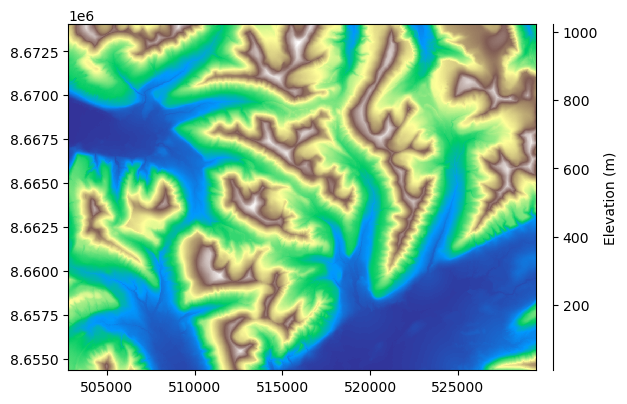

In [5]:
# Open a vector file of glacier outlines near the DEM
import geoutils as gu
fn_glacier_outlines = xdem.examples.get_path("longyearbyen_glacier_outlines")
vect_gla = gu.Vector(fn_glacier_outlines)

# Plot the DEM and the vector file
dem.plot(cmap="terrain", cbar_title="Elevation (m)")
vect_gla.plot(dem)  # We pass the DEM as reference for the plot CRS/extent

## Vertical referencing

The vertical reference of a {class}`~xdem.DEM` is stored in {attr}`~xdem.DEM.vcrs`, and derived either from its
{attr}`~xdem.DEM.crs` (if 3D) or assessed from the DEM product name during instantiation.

In [6]:
# Check vertical CRS of dataset
dem.vcrs

In this case, the DEM has no defined vertical CRS, which is quite common. To set the vertical CRS manually,
use {class}`~xdem.DEM.set_vcrs`. Then, to transform into another vertical CRS, use {class}`~xdem.DEM.to_vcrs`.

In [7]:
# Define the vertical CRS as the 3D ellipsoid of the 2D CRS
dem.set_vcrs("Ellipsoid")
# Transform to the EGM96 geoid
dem.to_vcrs("EGM96")

DEM(
  data=[[552.844970703125 561.4555053710938 566.9647827148438 ...
         244.73574829101562 255.0602569580078 264.2195739746094]
        [553.3552856445312 562.0689086914062 571.1232299804688 ...
         244.90061950683594 256.1825866699219 266.5284729003906]
        [552.4747314453125 561.7349853515625 570.4039916992188 ...
         243.29054260253906 253.91836547851562 264.7453918457031]
        ...
        [327.612548828125 326.80401611328125 325.9011535644531 ...
         526.854736328125 529.5508422851562 533.6632080078125]
        [328.2633361816406 327.5744934082031 326.6269836425781 ...
         512.1184692382812 514.7266845703125 518.1988525390625]
        [329.04254150390625 328.2438659667969 327.3596496582031 ...
         497.5435485839844 500.67388916015625 505.9179992675781]]
  transform=| 20.00, 0.00, 502810.00|
            | 0.00,-20.00, 8674030.00|
            | 0.00, 0.00, 1.00|
  crs=EPSG:25833
  nodata=-9999.0)

```{note}
For more details on vertical referencing, see the {ref}`vertical-ref` page.
```

## Terrain attributes

A wide range of terrain attributes can be derived from a {class}`~xdem.DEM`, with several methods and options available,
by calling the function corresponding to the attribute name such as {func}`~xdem.DEM.slope`.

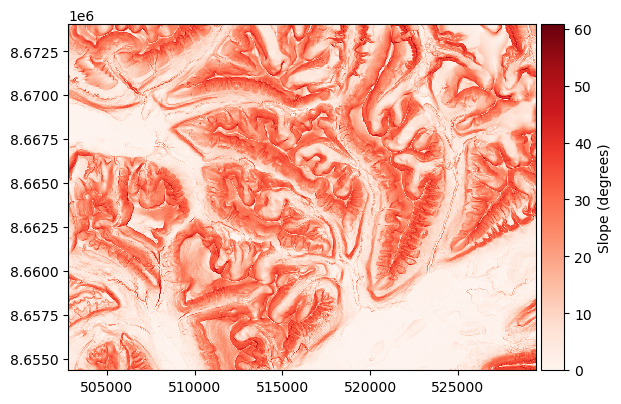

In [8]:
# Derive slope using the Zevenberg and Thorne (1987) method
slope = dem.slope(method="ZevenbergThorne")
slope.plot(cmap="Reds", cbar_title="Slope (degrees)")

```{note}
For the full list of terrain attributes, see the {ref}`terrain-attributes` page.
```

## Coregistration

3D coregistration is performed with {func}`~xdem.DEM.coregister_3d`, which aligns the
{class}`~xdem.DEM` to another DEM using a pipeline defined with a {class}`~xdem.coreg.Coreg`
object (defaults to horizontal and vertical shifts).

/home/docs/checkouts/readthedocs.org/user_builds/xdem/conda/latest/lib/python3.11/site-packages/geoutils/raster/raster.py:2731: UserWarning: Output projection, bounds and grid size are identical -> returning self (not a copy!)
  warnings.warn(


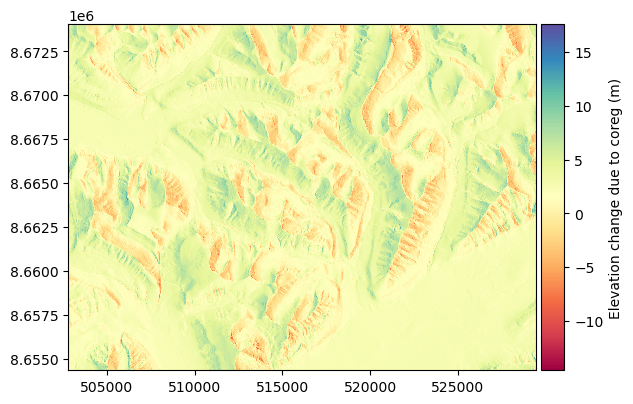

In [9]:
# Another DEM to-be-aligned to the first one
filename_tba = xdem.examples.get_path("longyearbyen_tba_dem")
dem_tba = xdem.DEM(filename_tba)

# Coregister (horizontal and vertical shifts)
dem_tba_coreg = dem_tba.coregister_3d(dem)

# Plot the elevation change of the DEM due to coregistration
dh_tba = dem_tba - dem_tba_coreg.reproject(dem_tba)
dh_tba.plot(cmap="Spectral", cbar_title="Elevation change due to coreg (m)")

```{note}
For more details on building coregistration pipelines and accessing metadata, see the {ref}`coregistration` page.
```

## Uncertainty analysis

Estimation of DEM-related uncertainty can be performed with {func}`~xdem.DEM.estimate_uncertainty`, which estimates both
**an error map** considering variable per-pixel errors and **the spatial correlation of errors**. The workflow relies
on an independent elevation data object that is **assumed to have either much finer or similar precision**, and uses
stable terrain as a proxy.

0.08538014001226914

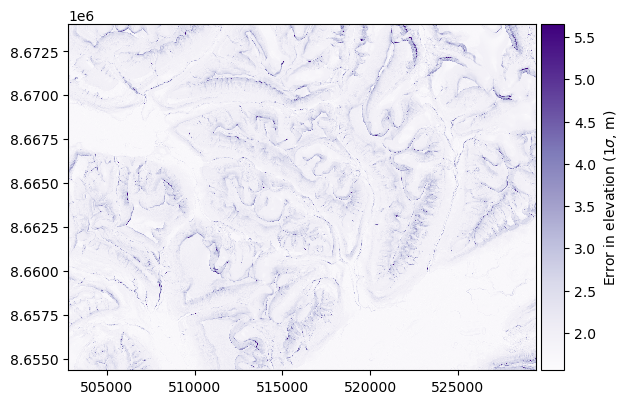

In [10]:
# Estimate elevation uncertainty assuming both DEMs have similar precision
sig_dem, rho_sig = dem.estimate_uncertainty(dem_tba_coreg, precision_of_other="same")

# The error map variability is estimated from slope and curvature by default
sig_dem.plot(cmap="Purples", cbar_title=r"Error in elevation (1$\sigma$, m)")

# The spatial correlation function represents how much errors are correlated at a certain distance
rho_sig(1000)  # Correlation at 1 km
